<a href="https://colab.research.google.com/github/JakeOh/202007_itw_bd18/blob/master/lab_python/python48_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
iris = sns.load_dataset('iris')
iris.iloc[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.iloc[-5:]

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
iris.shape

(150, 5)

In [6]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
iris.describe()  # 숫자 타입 컬럼

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris['species'].describe()  # 명목형 컬럼

count            150
unique             3
top       versicolor
freq              50
Name: species, dtype: object

In [9]:
iris['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

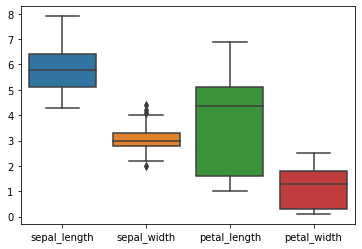

In [10]:
sns.boxplot(data=iris)  # iris.describe() 결과를 box plot으로 표현.
plt.show()

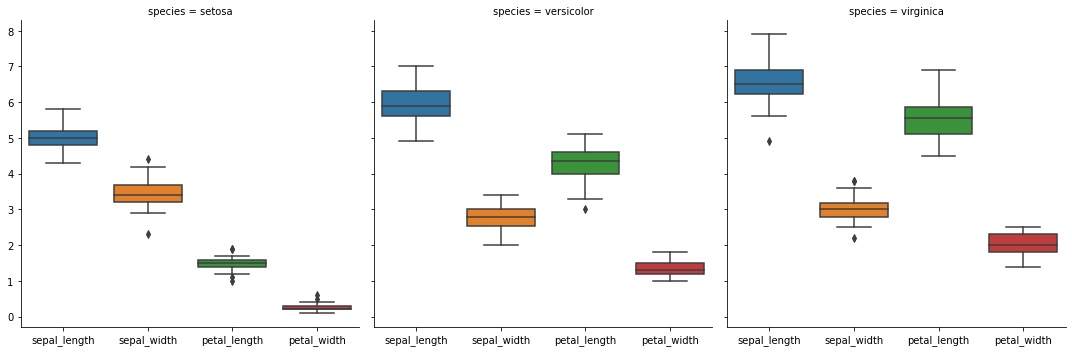

In [12]:
# species 별로 subplot의 컬럼을 구별, 데이터 프레임 box plot
sns.catplot(data=iris, col='species', kind='box')
plt.show()

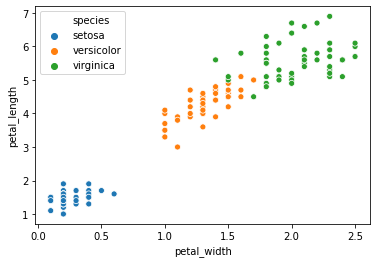

In [13]:
# petal_length ~ petal_width 산점도 그래프. 점들의 색깔은 species에 따라서 다르게 표현.
sns.scatterplot(x='petal_width', y='petal_length', hue='species', data=iris)
plt.show()

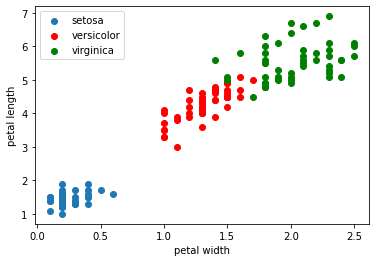

In [26]:
# pyplot 함수 사용.
setosa = iris[iris['species'] == 'setosa']  # iris.iloc[0:50]
versicolor = iris[iris['species'] == 'versicolor']  # iris.iloc[50:100]
virginica = iris[iris['species'] == 'virginica']  # iris.iloc[100:]

plt.scatter(x='petal_width', y='petal_length', data=setosa, label='setosa')
plt.scatter(x='petal_width', y='petal_length', data=versicolor, c='red', label='versicolor')
plt.scatter(x='petal_width', y='petal_length', data=virginica, c='green', label='virginica')

plt.xlabel('petal width')
plt.ylabel('petal length')
plt.legend()
plt.show()

In [34]:
def iris_scatter_plot(x, y, data):
    """x: x축에 사용할 컬럼 이름(str), y: y축에 사용할 컬럼 이름(str), data: iris DataFrame
    iris 데이터 프레임에서 품종별로 점의 색깔을 다르게 해서 산점도 그래프를 그림.
    """
    species = data['species'].unique()  
    
    for sp in species:
        subset = data[data['species'] == sp]
        plt.scatter(x, y, data=subset, label=sp)

    plt.legend()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

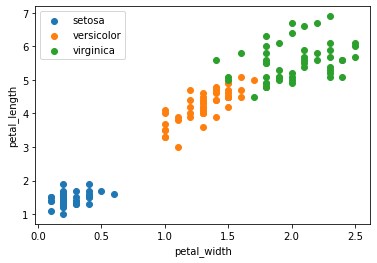

In [35]:
iris_scatter_plot('petal_width', 'petal_length', iris)

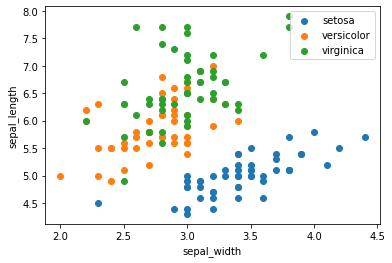

In [36]:
iris_scatter_plot('sepal_width', 'sepal_length', iris)

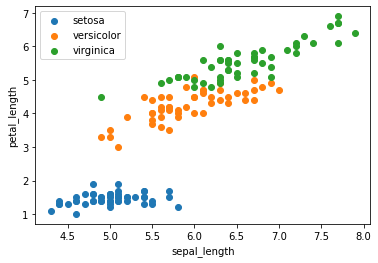

In [37]:
iris_scatter_plot('sepal_length', 'petal_length', iris)

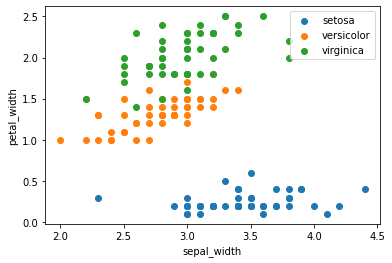

In [38]:
iris_scatter_plot('sepal_width', 'petal_width', iris)

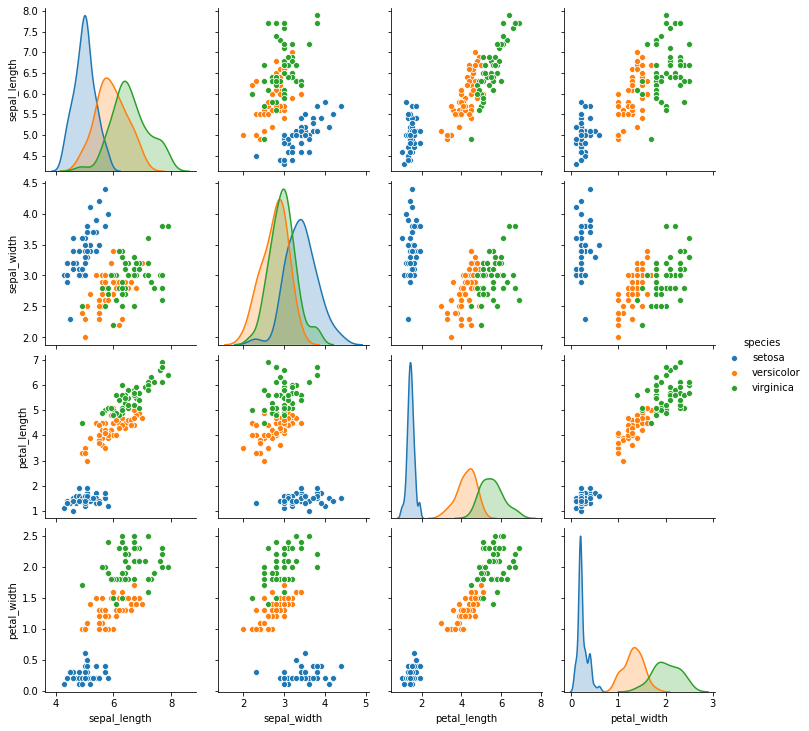

In [39]:
# seaborn.pairplot(): 각 변수(컬럼)들 간의 상관 관계를 산점도 그래프로 표현.
sns.pairplot(data=iris, hue='species')
plt.show()